Increase the layers (Refer from very deep convolutional...)
=========
**the number of try = 28**
epochを80に変更


In [1]:
# importing of modules for CIFAR-10 CNN 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


The following constant and variable definitions are needed for the network and training parameters.


In [12]:
#training constants
BATCH_SIZE = 32 #originally 128
N_EPOCH = 40 # use 20 for best initial results
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

print('Main variables initialised.')

Main variables initialised.


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Constant definition for the training set images

In [13]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')

Image variables initialisation


__CIFAR-10 data loading and processing__

Loading and preparation of the CIFAR-10 training set.

In [14]:
#load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')
 
# convert to categorical
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES) 

# float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255


input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
#20以降で使う
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(zca_whitening=True)
train_datagen.fit(input_X_train)
train_generator = train_datagen.flow(input_X_train, output_Y_train, batch_size=len(input_X_train))
#batch_size=len(input_X_train))
x_train_gen, y_train_gen = train_generator.next()

test_datagen = ImageDataGenerator(zca_whitening=True)
test_datagen.fit(input_X_test)
test_generator = train_datagen.flow(input_X_test, output_Y_test, batch_size=len(input_X_test))
x_test_gen, y_test_gen = test_generator.next()

/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1444: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn(


A deeper CNN
-------------




In [17]:
# REUSE THE SAME INITIALISATION CODE AND THE TRAINING AND TEST DATA SET LOADING OPERATION

N_EPOCH = 80 # 40 bigger network will benefit from extra training epochs
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
# Complex DNN model definition
model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.30))
 
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3)) #0.0005
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.30))

model.add(Conv2D(128, kernel_size=3,padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, kernel_size=3,kernel_regularizer=regularizers.l2(0.001), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.30))

model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))


#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()
 


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_18 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 activation_19 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                  

**Training of the deeper CNN**

Let's train (fit) this new model.



In [18]:
# training/fitting of the complex DNN model 
#history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)
history = model.fit(x_train_gen, y_train_gen, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)


Epoch 1/80
1250/1250 [==============================] - 11s 8ms/step - loss: 2.3654 - accuracy: 0.2057 - val_loss: 1.8024 - val_accuracy: 0.3511
Epoch 2/80
1250/1250 [==============================] - 9s 7ms/step - loss: 1.7958 - accuracy: 0.3568 - val_loss: 1.6581 - val_accuracy: 0.4124
Epoch 3/80
1250/1250 [==============================] - 9s 8ms/step - loss: 1.5475 - accuracy: 0.4618 - val_loss: 1.3980 - val_accuracy: 0.5274
Epoch 4/80
1250/1250 [==============================] - 9s 7ms/step - loss: 1.4039 - accuracy: 0.5184 - val_loss: 1.2891 - val_accuracy: 0.5559
Epoch 5/80
1250/1250 [==============================] - 10s 8ms/step - loss: 1.3084 - accuracy: 0.5527 - val_loss: 1.0891 - val_accuracy: 0.6198
Epoch 6/80
1250/1250 [==============================] - 9s 7ms/step - loss: 1.2356 - accuracy: 0.5849 - val_loss: 1.0882 - val_accuracy: 0.6324
Epoch 7/80
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1885 - accuracy: 0.6007 - val_loss: 1.0414 - val_accurac

**Analysis of the Deeper CNN results**

This generates the test scores and plots for the new, deeper DNN.


313/313 [==============================] - 1s 4ms/step - loss: 0.7164 - accuracy: 0.7726

Test score/loss: 0.7163718938827515
Test accuracy: 0.772599995136261
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


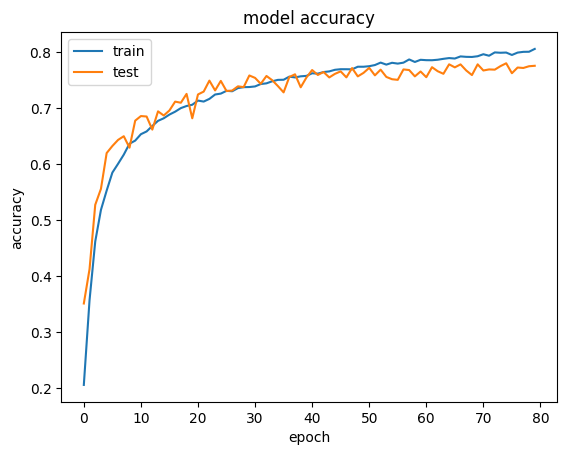

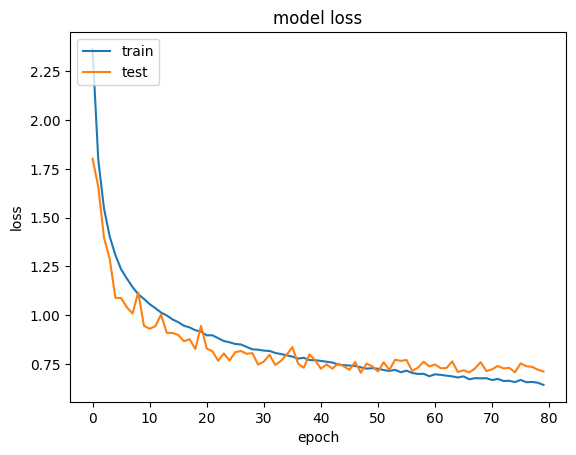

In [19]:
#Testing
#score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
score = model.evaluate(x_test_gen, y_test_gen, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Data Augmentation
-------------

To further improve the performance of the model, it is advisable to use a larger training set, to expose the network to more variations of the images.
One way to achieve this, without having to collect new images from the real world, is to __augment__ the existing images with multiple types of transformations of the dataset stimuli. This can include rotation of the image, rescaling, horizontal/vertical flip, zooming, channel shift, etc.

Below is an example of the code that augments the current datase.




In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.datasets import cifar10

#load dataset
#(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()

# augumenting
print("Augmenting training set images...")
    
datagen = ImageDataGenerator(
   rotation_range=40,
   width_shift_range=0.2,
   height_shift_range=0.2,
   zoom_range=0.2,
   horizontal_flip=True,
   fill_mode='nearest')

# rotation_range is a value in degrees (0 - 180) for randomly rotating pictures
# width_shift and height_shift are ranges for randomly translating pictures vertically or horizontally
# zoom_range is for randomly zooming pictures 
# horizontal_flip is for randomly flipping the images horizontally
# fill_mode fills in new pixels that can appear after a rotation or a shift


Augmenting training set images...


__Training with augmented data__

The function below used the dynamic generation of the augmented data during the training (just in time).

In [ ]:

#fit the dataset
datagen.fit(input_X_train)


# train by fitting the model on batches with real-time data augmentation
history = model.fit_generator(datagen.flow(input_X_train, output_Y_train, batch_size=BATCH_SIZE), steps_per_epoch=input_X_train.shape[0]//BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE)



Epoch 1/2


<ipython-input-17-27f0d892da1d>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(input_X_train, output_Y_train, batch_size=BATCH_SIZE), steps_per_epoch=input_X_train.shape[0]//BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE)


390/390 [==============================] - 33s 84ms/step - loss: 1.7518 - accuracy: 0.3607
Epoch 2/2
390/390 [==============================] - 31s 80ms/step - loss: 1.6588 - accuracy: 0.3969


**Analysis of the Data Augmented, Deeper CNN results**

This generates the test scores and plots for the deeper DNN trained on the augmented data.

79/79 [==============================] - 0s 6ms/step - loss: 1.3647 - accuracy: 0.4979

Test score/loss: 1.3647339344024658
Test accuracy: 0.49790000915527344
dict_keys(['loss', 'accuracy'])


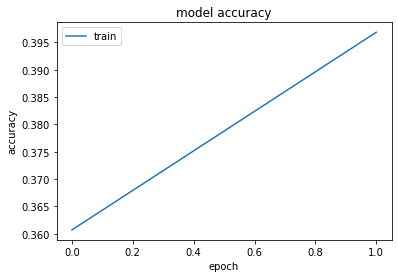

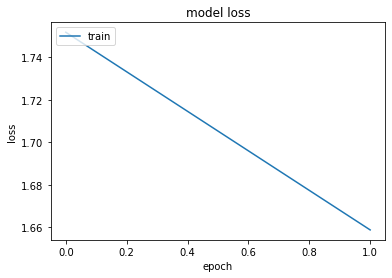

In [ ]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



Below is a commented different example of a data augmentation approach. 

But we have carried out plenty of slow, long simulations for this class, and we can stop here.

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(input_X_train)

Conclusions
-------------

Today we learned to train more complex DNNs, and to use data augmentation to further improve the network training and performance.

**Copyright (c)** 2022 Angelo Cangelosi, MIT License. Code and examples adapted from Gulli & Pal (2017) Deep Learning with Kera. Punkt Publishing. With support from Wenjie Huang.